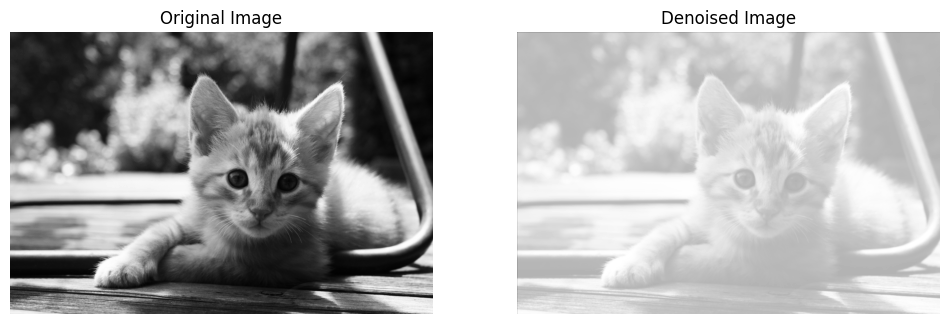

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.io import imread
from skimage.color import rgb2gray

def conductivity_function(grad, K):
    return np.exp(-(grad / K) ** 2)

def compute_gradients(image):
    grad_x = np.diff(image, axis=1, append=image[:, -1:])
    grad_y = np.diff(image, axis=0, append=image[-1:, :])
    return grad_x, grad_y

def update_image(image, grad_x, grad_y, c_x, c_y, delta_t):
    div_x = np.diff(c_x * grad_x, axis=1, prepend=c_x[:, :1])
    div_y = np.diff(c_y * grad_y, axis=0, prepend=c_y[:1, :])
    return image + delta_t * (div_x + div_y)

def anisotropic_diffusion(image, num_iter, K, delta_t):
    for _ in range(num_iter):
        grad_x, grad_y = compute_gradients(image)
        grad_magnitude = np.sqrt(grad_x ** 2 + grad_y ** 2)
        c_x = conductivity_function(grad_magnitude, K)
        c_y = conductivity_function(grad_magnitude, K)
        image = update_image(image, grad_x, grad_y, c_x, c_y, delta_t)
    return image

# Load and preprocess image
image = img_as_float(imread('https://upload.wikimedia.org/wikipedia/commons/a/a5/Red_Kitten_01.jpg'))
if len(image.shape) == 3:
    image = rgb2gray(image)

# Parameters for anisotropic diffusion
num_iter = 20  # Number of iterations
K = 15  # Conductivity parameter
delta_t = 0.1  # Time step

# Perform anisotropic diffusion
denoised_image = anisotropic_diffusion(image, num_iter, K, delta_t)

# Display original and denoised images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')

plt.show()